In [2]:
import json
import pandas as pd
from collections import Counter, defaultdict
import numpy as np
import tqdm
import os
import re
from matplotlib import pyplot as plt 

In [5]:
dataset_dir = "../Datasets/cei/"

In [40]:
sents = []
dataset = []
number_of_sentences = 0
for file_name in os.listdir(dataset_dir+"/labels"):
    if file_name == '.ipynb_checkpoints':
        continue
    with open(dataset_dir+"/text/"+file_name, "r") as ftext:
        text_sents = ftext.readlines()
        sents.extend(text_sents)
        number_of_sentences += len(text_sents)
        text = " ".join([sent.strip() for sent in text_sents])
    with open(dataset_dir+"/labels/"+file_name, "r") as flabels:
        labels_text = flabels.readline()
        sent_labels = re.split("<", labels_text.strip())[1:]
        
        labels = [label.strip().split("--")[0].lower() + "---" + label.strip().split("--")[1].lower() 
                  for label in re.split("<|AND", labels_text) 
                  if label != '' and label != ' ' and "NULL" not in label]
        dataset.append({'pmid': file_name.strip(".txt"), 
                        'text': text, 
                        'labels': list(set(labels)),
                        'labels_per_sentence': sent_labels})

In [41]:
number_of_sentences

36153

In [42]:
print("Number of papers: ", len(dataset))

Number of papers:  3661


# Labels Statistics

In [43]:
labels = [row['labels'] for row in dataset]

In [44]:
print("Average labels per example: ", np.mean([len(label_set) for label_set in labels]))
print("Standard dev labels per example: ", np.std([len(label_set) for label_set in labels]))

Average labels per example:  1.883911499590276
Standard dev labels per example:  0.8587264964259516


In [45]:
frequencies = Counter([c for clist in labels for c in clist])

In [46]:
print("Number of labels:", len(frequencies))
frequencies = dict(sorted(frequencies.items(), key=lambda item: item[1], reverse=True))

Number of labels: 11


In [48]:
frequencies.keys()

dict_keys(['biomonitoring---exposure biomarker', 'exposure routes---oral intake', 'biomonitoring---effect marker', 'exposure routes---inhalation', 'site comparisons---workplace', 'site comparisons---polluted area', 'exposure routes---dermal uptake', 'exposure routes---', 'exposure routes---combined', 'site comparisons---', 'biomonitoring---'])

In [49]:
with open("../Datasets/cei/topics.json", "w") as ftopics:
    for label in frequencies.keys():
        ftopics.write(label + "\n") 

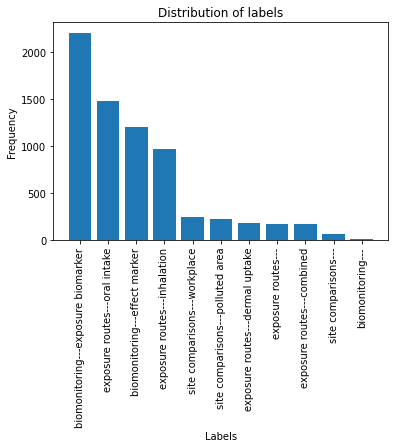

In [50]:
plt.bar(x=frequencies.keys(), height=frequencies.values())
plt.title("Distribution of labels")
plt.xlabel("Labels")
plt.xticks(range(len(frequencies)), frequencies.keys(), rotation='vertical')
plt.ylabel("Frequency")
plt.show()

# Corpus Statistics

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 3661/3661 [00:00<00:00, 22657.13it/s]


 average words per text: 276.56842392788855
 standard deviation on words per text: 72.86280453406054
 average sentences per text: 9.875170718382956


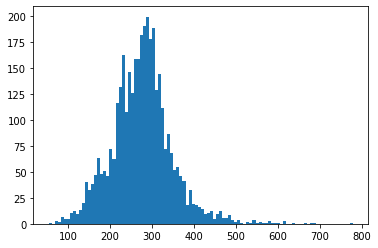

In [51]:
text_words = []
for row in tqdm.tqdm(dataset):
    text = row['text']
    text_words.append(len(text.split()))
    
mean_text_words = np.mean(text_words)
sd_text_words = np.std(text_words)
mean_text_sentences = number_of_sentences / len(dataset)
print(' average words per text:', mean_text_words)
print(' standard deviation on words per text:', sd_text_words)
print(' average sentences per text:', mean_text_sentences)
    
plt.hist(text_words, bins = 100)
plt.show()

# Save dataset in json format

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
train, val = train_test_split(dataset, test_size=0.10, random_state=44)

In [54]:
len(val)

367

In [55]:
len(train)

3294

In [56]:
with open("../Datasets/cei/train.json", "w") as ftrain:
    json.dump(train, ftrain)
with open("../Datasets/cei/val.json", "w") as fval:
    json.dump(val, fval)